In [200]:
#!pip install astropy
#!pip install sep
import numpy as np
import sep
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

#print(astropy.__version__)
#print(sep.__version__)


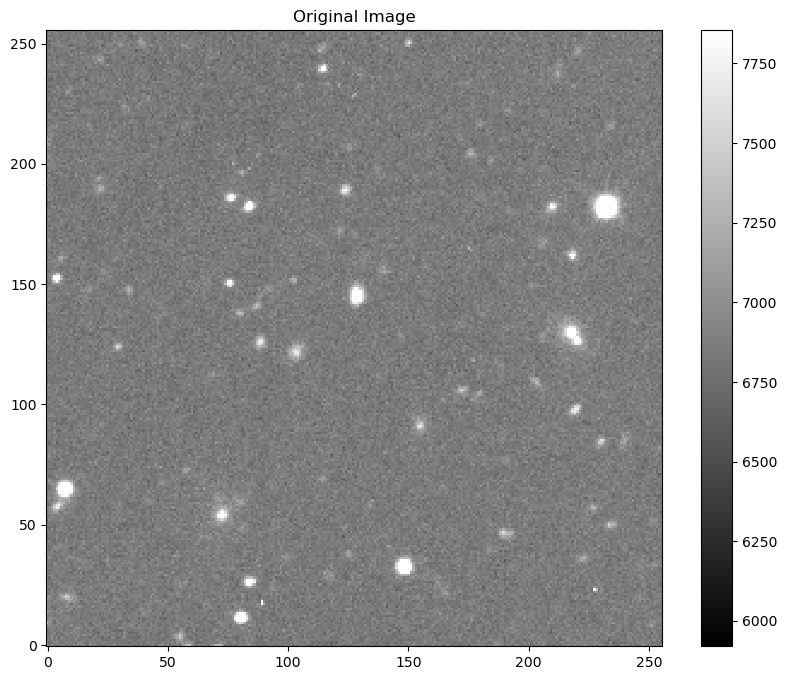

In [201]:
# Read the FITS  image into a 2D numpy array
data, header = fits.getdata("/Users/ayush/Desktop/ASTR 19/image.fits", header=True)

# Show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Original Image')
plt.show()


Background mean: 6852.04931640625, Background RMS: 65.46174621582031


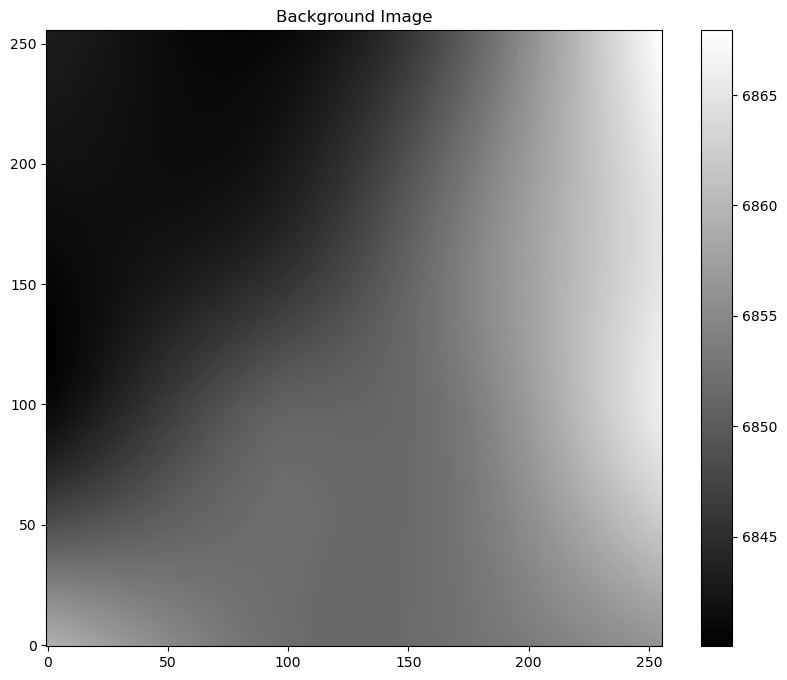

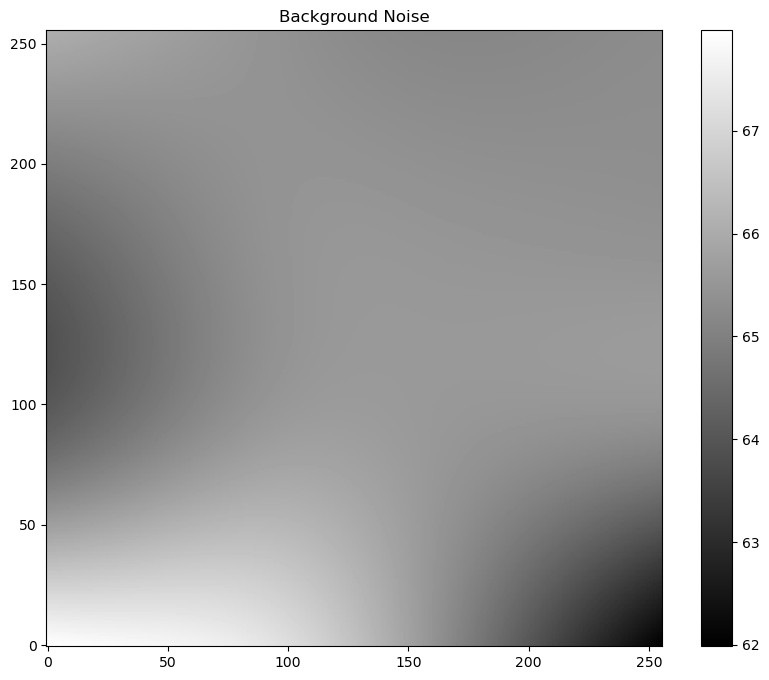

In [202]:
# Measure a spatially varying background
data = data.astype(np.float32)
bkg = sep.Background(data)

# Global mean and RMS of the background
print(f"Background mean: {bkg.globalback}, Background RMS: {bkg.globalrms}")

# Background as a 2D array
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Image')
plt.show()

# Background noise as a 2D array
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Noise')
plt.show()

# Subtract the background from the image
data_sub = data - bkg


Number of objects detected: 68


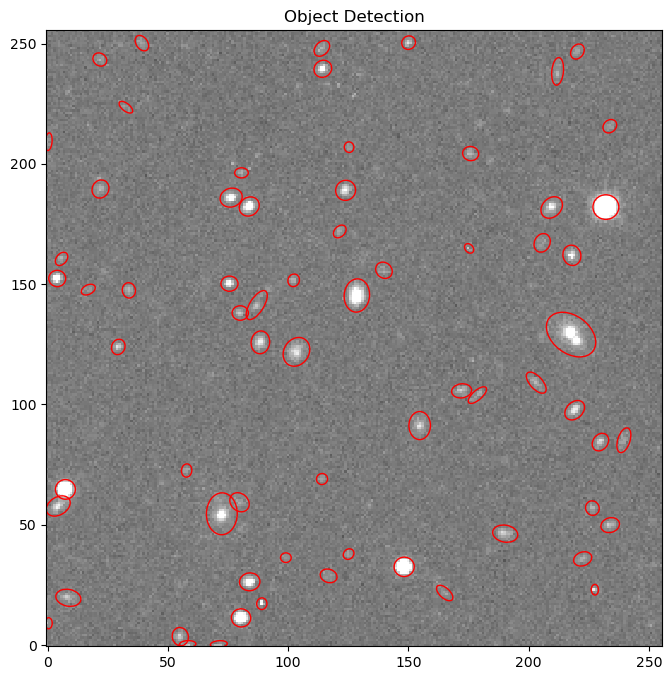

In [203]:
# Run object detection
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# How many objects were detected?
print(f"Number of objects detected: {len(objects)}")

# Visualize the object locations on the image
from matplotlib.patches import Ellipse

# Plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot ellipses for each detected object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i], height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title('Object Detection')
plt.show()


In [204]:
# Perform aperture photometry
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
m_flux = -2.5*np.log10(flux)
# Show the first 10 objects' flux and errors
for i in range(10):
    print(f"Object {i}: Flux = {flux[i]:.2f} ± {fluxerr[i]:.2f}")


Object 0: Flux = 2249.16 ± 291.03
Object 1: Flux = 3092.22 ± 291.59
Object 2: Flux = 5949.86 ± 356.56
Object 3: Flux = 1851.42 ± 295.03
Object 4: Flux = 72736.38 ± 440.17
Object 5: Flux = 3860.76 ± 352.16
Object 6: Flux = 6418.90 ± 357.46
Object 7: Flux = 2210.71 ± 350.79
Object 8: Flux = 2741.61 ± 352.28
Object 9: Flux = 20916.88 ± 376.97
